In [141]:
import pandas as pd
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.polynomial.polynomial import polyfit
import matplotlib as mpl

In [142]:
coviddata = pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\2019_nCoV_data.csv')

In [143]:
df = pd.DataFrame(coviddata)

df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020 12:00,Anhui,China,1/22/2020 12:00,1,0,0
1,2,1/22/2020 12:00,Beijing,China,1/22/2020 12:00,14,0,0
2,3,1/22/2020 12:00,Chongqing,China,1/22/2020 12:00,6,0,0
3,4,1/22/2020 12:00,Fujian,China,1/22/2020 12:00,1,0,0
4,5,1/22/2020 12:00,Gansu,China,1/22/2020 12:00,0,0,0
5,6,1/22/2020 12:00,Guangdong,China,1/22/2020 12:00,26,0,0
6,7,1/22/2020 12:00,Guangxi,China,1/22/2020 12:00,2,0,0
7,8,1/22/2020 12:00,Guizhou,China,1/22/2020 12:00,1,0,0
8,9,1/22/2020 12:00,Hainan,China,1/22/2020 12:00,4,0,0
9,10,1/22/2020 12:00,Hebei,China,1/22/2020 12:00,1,0,0


In [144]:
del df['Sno']

In [145]:
df

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1/22/2020 12:00,Anhui,China,1/22/2020 12:00,1,0,0
1,1/22/2020 12:00,Beijing,China,1/22/2020 12:00,14,0,0
2,1/22/2020 12:00,Chongqing,China,1/22/2020 12:00,6,0,0
3,1/22/2020 12:00,Fujian,China,1/22/2020 12:00,1,0,0
4,1/22/2020 12:00,Gansu,China,1/22/2020 12:00,0,0,0
5,1/22/2020 12:00,Guangdong,China,1/22/2020 12:00,26,0,0
6,1/22/2020 12:00,Guangxi,China,1/22/2020 12:00,2,0,0
7,1/22/2020 12:00,Guizhou,China,1/22/2020 12:00,1,0,0
8,1/22/2020 12:00,Hainan,China,1/22/2020 12:00,4,0,0
9,1/22/2020 12:00,Hebei,China,1/22/2020 12:00,1,0,0


In [146]:
df.isnull().any()

Date              False
Province/State     True
Country           False
Last Update       False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

In [147]:
df["Province/State"].fillna("Unknown", inplace = True)  
  
df

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1/22/2020 12:00,Anhui,China,1/22/2020 12:00,1,0,0
1,1/22/2020 12:00,Beijing,China,1/22/2020 12:00,14,0,0
2,1/22/2020 12:00,Chongqing,China,1/22/2020 12:00,6,0,0
3,1/22/2020 12:00,Fujian,China,1/22/2020 12:00,1,0,0
4,1/22/2020 12:00,Gansu,China,1/22/2020 12:00,0,0,0
5,1/22/2020 12:00,Guangdong,China,1/22/2020 12:00,26,0,0
6,1/22/2020 12:00,Guangxi,China,1/22/2020 12:00,2,0,0
7,1/22/2020 12:00,Guizhou,China,1/22/2020 12:00,1,0,0
8,1/22/2020 12:00,Hainan,China,1/22/2020 12:00,4,0,0
9,1/22/2020 12:00,Hebei,China,1/22/2020 12:00,1,0,0


In [148]:
clean_date = []
for i in range(df.shape[0]):
    A = df.iloc[i]['Date'].split(' ')
    A = A[0].replace('/2020', '')
    clean_date.append(A)
clean_date

['1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/22',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/23',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 '1/24',
 

In [149]:
df['Date_new'] = clean_date

In [150]:
del df['Date']
del df['Last Update']

In [151]:
df

,Province/State,Country,Confirmed,Deaths,Recovered,Date_new
0,Anhui,China,1,0,0,1/22
1,Beijing,China,14,0,0,1/22
2,Chongqing,China,6,0,0,1/22
3,Fujian,China,1,0,0,1/22
4,Gansu,China,0,0,0,1/22
5,Guangdong,China,26,0,0,1/22
6,Guangxi,China,2,0,0,1/22
7,Guizhou,China,1,0,0,1/22
8,Hainan,China,4,0,0,1/22
9,Hebei,China,1,0,0,1/22


In [152]:
Aus = df[df['Country']=='Australia']

In [153]:
Aus = Aus.reset_index(drop=True)

In [154]:
Aus

,Province/State,Country,Confirmed,Deaths,Recovered,Date_new
0,Unknown,Australia,0,0,0,1/23
1,Unknown,Australia,4,0,0,1/25
2,Unknown,Australia,4,0,0,1/26
3,New South Wales,Australia,4,0,0,1/27
4,Victoria,Australia,1,0,0,1/27
5,New South Wales,Australia,4,0,0,1/28
6,Victoria,Australia,1,0,0,1/28
7,New South Wales,Australia,4,0,0,1/29
8,Victoria,Australia,2,0,0,1/29
9,Queensland,Australia,1,0,0,1/29


In [155]:
Aus.max()

Province/State     Victoria
Country           Australia
Confirmed                 5
Deaths                    0
Recovered                 4
Date_new                2/9
dtype: object

In [156]:
Aus.mean()

Confirmed    3.380952
Deaths       0.000000
Recovered    0.833333
dtype: float64

In [157]:
df.to_csv('datacovid.csv')

In [158]:
Aus.to_csv('Aus.csv')

Text(0.5, 1.0, 'Number of people infected jan-feb 2020')

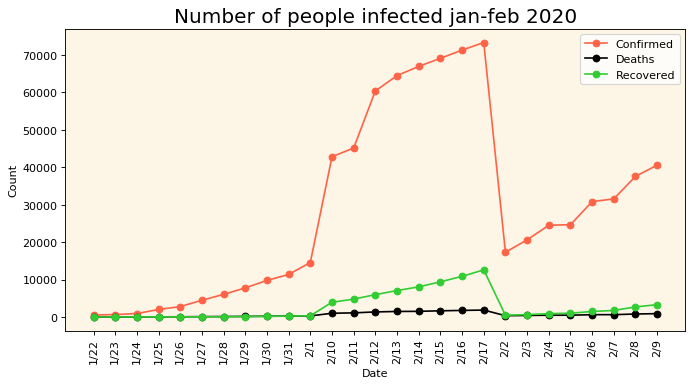

In [159]:

x = df.groupby(['Date_new'], as_index=False).sum()['Date_new']
y1 = df.groupby(['Date_new'], as_index=False).sum()['Confirmed']
y2 = df.groupby(['Date_new'], as_index=False).sum()['Deaths']
y3 = df.groupby(['Date_new'], as_index=False).sum()['Recovered']
plt.figure(figsize=[10,5],dpi=80)
plt.gca(facecolor='oldlace')
plt.plot(x,y1,'tomato',label = "Confirmed",marker='o')
plt.plot(x,y2,'black',label = "Deaths",marker='o')
plt.plot(x,y3,'limegreen',label = "Recovered",marker='o')
plt.legend()
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of people infected jan-feb 2020',fontsize=18)

In [160]:
import matplotlib.pyplot as plt

In [162]:
Aus

,Province/State,Country,Confirmed,Deaths,Recovered,Date_new
0,Unknown,Australia,0,0,0,1/23
1,Unknown,Australia,4,0,0,1/25
2,Unknown,Australia,4,0,0,1/26
3,New South Wales,Australia,4,0,0,1/27
4,Victoria,Australia,1,0,0,1/27
5,New South Wales,Australia,4,0,0,1/28
6,Victoria,Australia,1,0,0,1/28
7,New South Wales,Australia,4,0,0,1/29
8,Victoria,Australia,2,0,0,1/29
9,Queensland,Australia,1,0,0,1/29


In [163]:
recovered = Aus['Recovered']
confirmed = Aus['Confirmed']
death = Aus['Deaths']
date = Aus['Date_new']

In [164]:
colors = []
for i in recovered[:] :
    if i == 0 :
        colors.append('b')
    elif i < 2 :
         colors.append('g')
    else :
         colors.append('r')
colors

['b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'r',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'r',
 'r',
 'b',
 'b',
 'r',
 'r',
 'b',
 'b',
 'r',
 'r',
 'b',
 'b',
 'r',
 'r',
 'b',
 'b',
 'r',
 'r',
 'r']

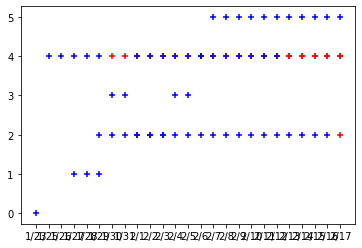

In [165]:
plt.scatter(date[:],confirmed[:],c = colors,cmap='winter',marker="+")

In [166]:
import squarify

In [167]:
c_confirm = df[['Country','Confirmed']]
group = c_confirm.groupby('Country')
group_plot = group.count().reset_index()

In [168]:
group_plot1 = pd.DataFrame(group_plot)

In [169]:
group_plot1

,Country,Confirmed
0,Australia,84
1,Belgium,14
2,Brazil,1
3,Cambodia,22
4,Canada,59
5,China,34
6,Egypt,4
7,Finland,20
8,France,25
9,Germany,22


In [170]:
comp_country = group_plot1.iloc[3:7,:2]

In [171]:
comp_country

,Country,Confirmed
3,Cambodia,22
4,Canada,59
5,China,34
6,Egypt,4


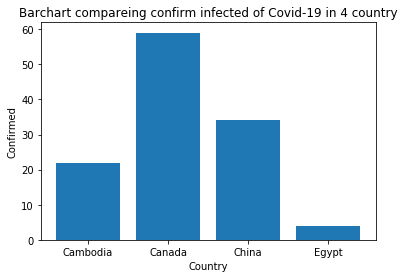

In [172]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar([1,2,3,4],comp_country.iloc[:,1],width=0.80,tick_label=comp_country.iloc[:,-2])
plt.title('Barchart compareing confirm infected of Covid-19 in 4 country')
plt.xlabel('Country')
plt.ylabel('Confirmed')




plt.show()

In [173]:
comp_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 3 to 6
Data columns (total 2 columns):
Country      4 non-null object
Confirmed    4 non-null int64
dtypes: int64(1), object(1)
memory usage: 148.0+ bytes
